### Carlos Enrique Hurtado Puente 
### 22929504

# Tarea 5:

## Comparación de Algoritmos de Clasificación

In [322]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import warnings
warnings.filterwarnings('ignore')

En está tarea van a evaluar (comparar) los diferentes algoritmos de claificación vistos en clase sobre un conjunto de datos sobre Predicción de Aprobación de Créditos. En el directorio de datos del repositorio se encuentran dos archivos uno para entrenar `PrediccionCreditos_train.csv`, y otro para probar `PrediccionCreditos_test.csv`. 

La columna objetivo es `Loan_Status`.

Deberan hacer:
1. Análisis Exploratorio de Datos.
2. Ingeniería de Atributos.
3. Y para cada algoritmo de clasificación ajustar los parámetros que produzcan el mejor modelo.
   
Podrán usar como base el notebook `19-ComparacionClasificadores.ipynb`.

Fecha de entrega: jueves 10 de Octubre (antes de la hora de clase)

## Cargar los Datos

In [323]:
data = pd.read_csv('../../datos/loan_data_set.csv')

## Explorar la Estructura de los Datos

### train data

In [324]:
# train data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### test data

## Eliminar la columna 'Loan_ID'  

In [325]:
data.drop(['Loan_ID'], axis=1, inplace=True)  
# data.drop(['Dependents'], axis=1, inplace=True)  

## Distribución de la Variable Objetivo

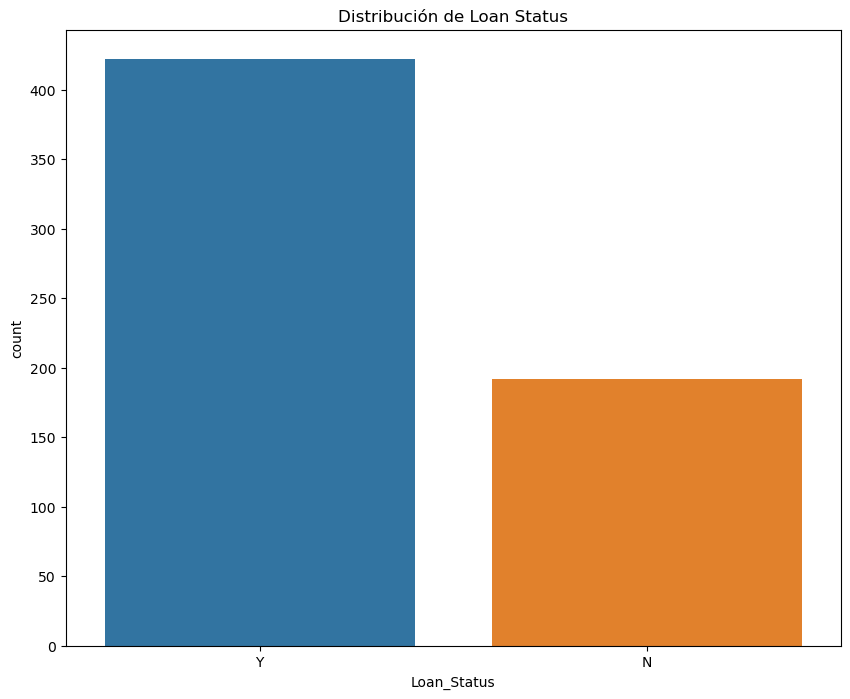

In [326]:
# Visualizar la distribución de la variable objetivo  
sns.countplot(x='Loan_Status', data=data)  
plt.title('Distribución de Loan Status')  
plt.show()  

## Análisis de Variables Categóricas

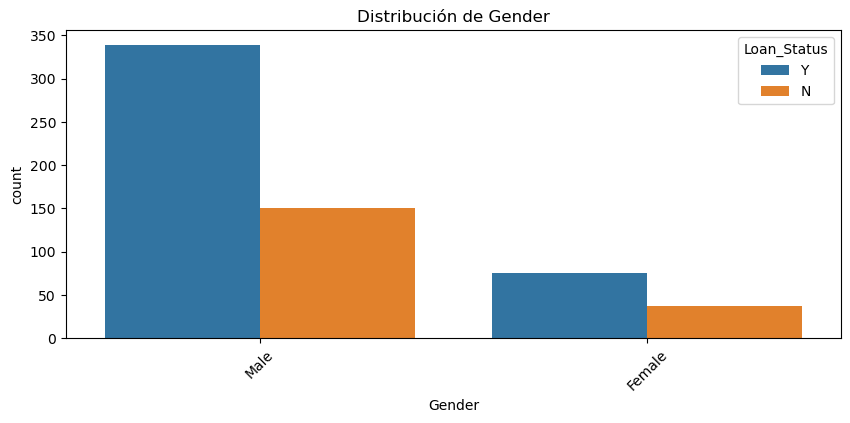

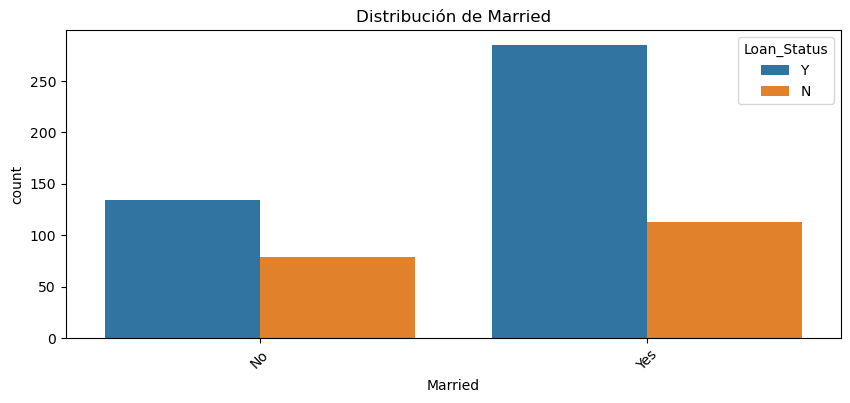

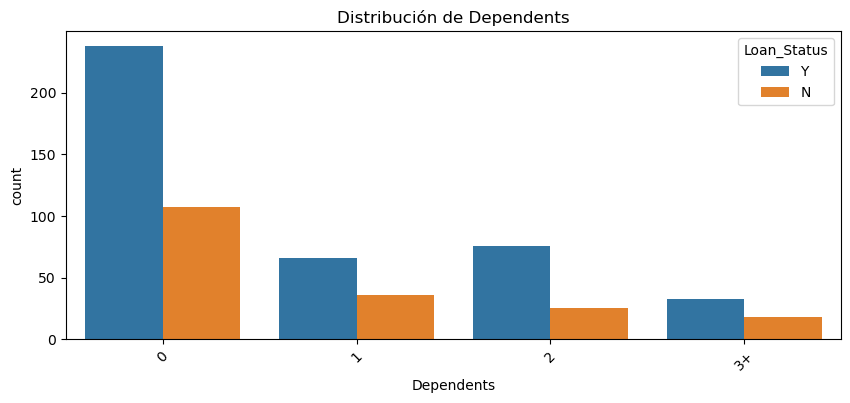

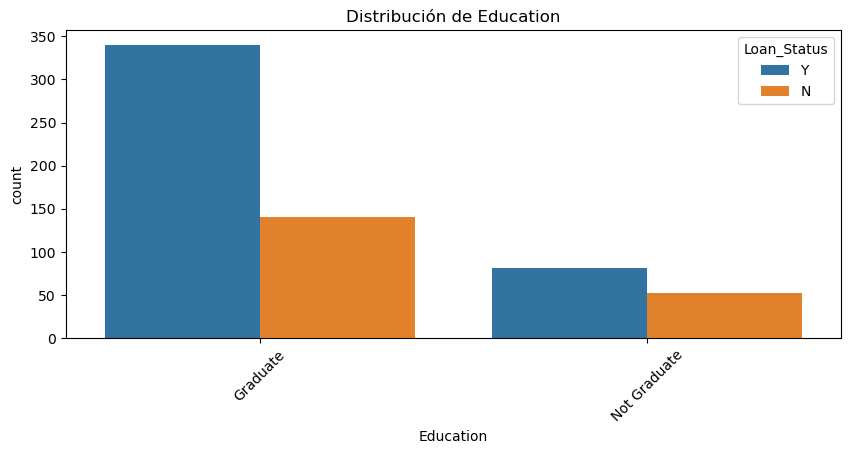

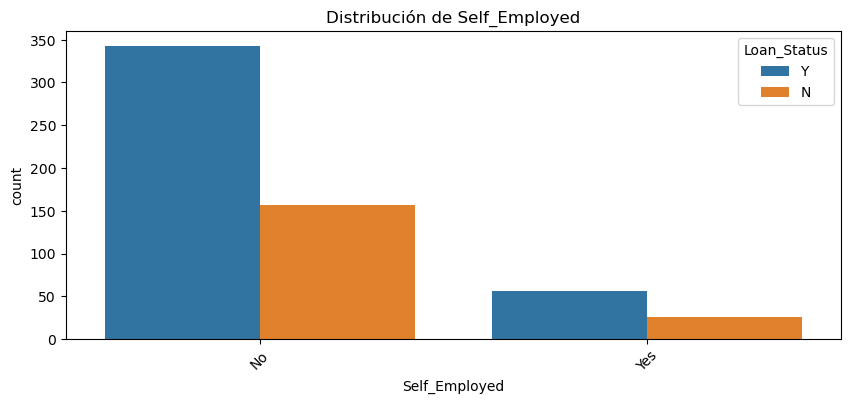

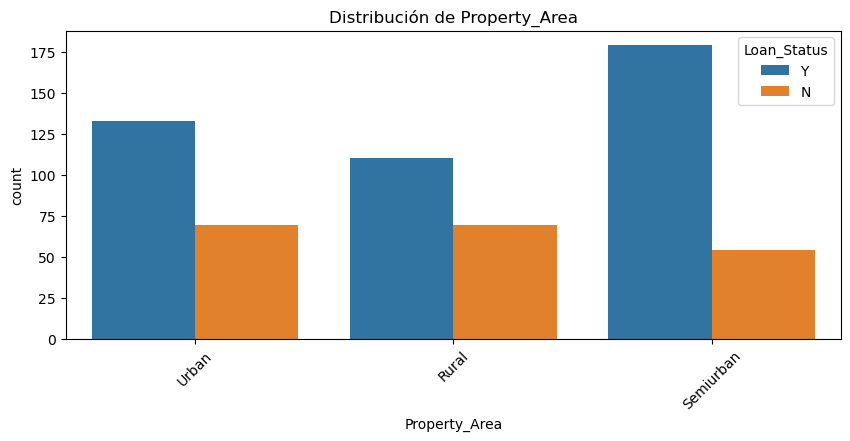

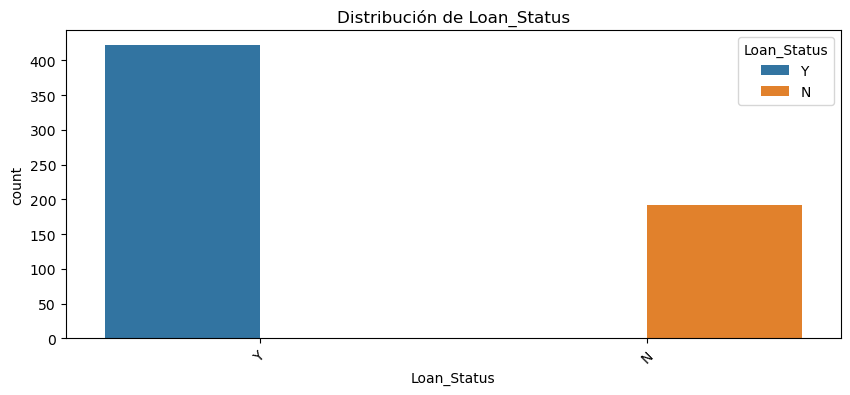

In [327]:
# Ver la distribución de variables categóricas  
categorical_columns = data.select_dtypes(include=['object']).columns  
for column in categorical_columns:  
    plt.figure(figsize=(10, 4))  
    sns.countplot(x=column, hue='Loan_Status', data=data)  
    plt.title(f'Distribución de {column}')  
    plt.xticks(rotation=45)  
    plt.show()  

## Análisis de Variables Numéricas

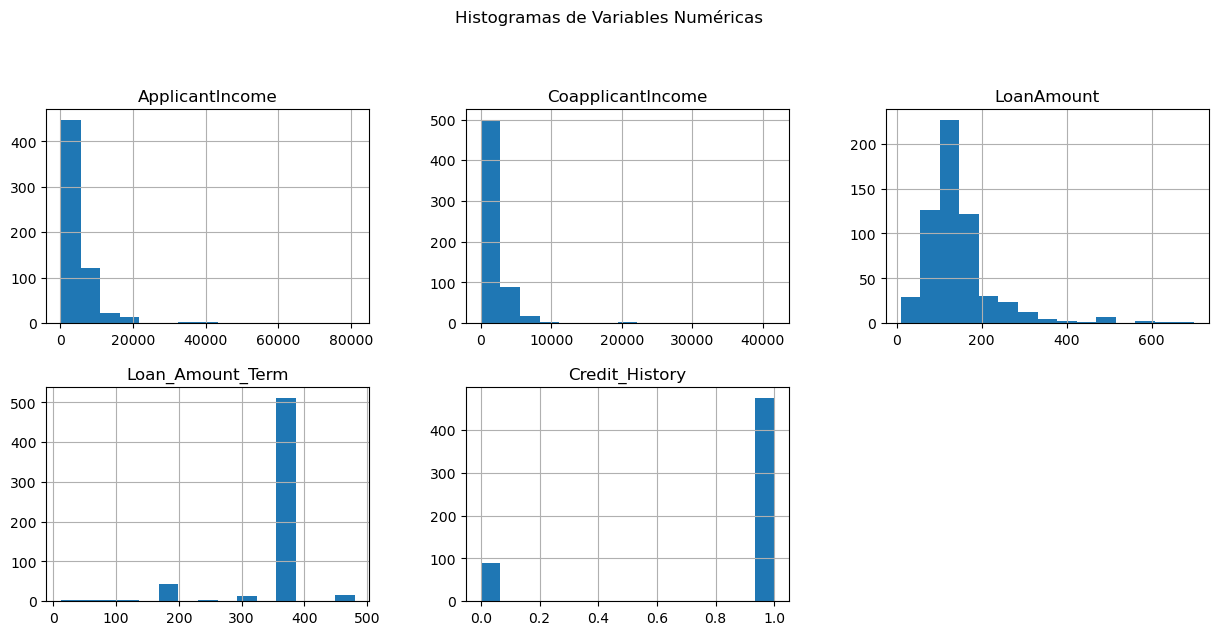

In [328]:
# Histograma de variables numéricas  
numeric_columns = data.select_dtypes(include=[np.number]).columns  
data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))  
plt.suptitle('Histogramas de Variables Numéricas')  
plt.show()

## Manejo de Valores Faltantes

In [329]:
# Valores faltantes  
missing_values = data.isnull().sum()  
missing_values[missing_values > 0]  

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

# Ingeniería de Atributos.

Manejo de Valores Faltantes

In [330]:
def fill_missing_values(df):
    for column in df.columns:
        # Si la columna es numérica, rellenar NaN con la media
        if df[column].dtype in ['float64', 'int64']:
            df[column].fillna(df[column].mean(), inplace=True)
        # Si la columna es categórica (object), rellenar NaN con la moda
        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

In [331]:
# df_clean = data.dropna()
data_fill = fill_missing_values(data)
data_fill.isnull().sum()
# df_clean.dtypes

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Transformar Variables Categóricas

In [332]:

def encode_labels(train_data, columns):
    le = LabelEncoder()
    for column in columns:
        if train_data[column].dtype == 'object':
            le.fit(train_data[column].unique())
            train_data[column] = le.transform(train_data[column])
    return train_data

In [333]:
columnas_categoricas = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 

In [334]:
df_clean = encode_labels(df_clean, columnas_categoricas) 


Crear un diccionario Python con los clasificadores a utilizar

In [335]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clasificadores = {
    "Naive Bayes": GaussianNB(),
    "Perceptrón": Perceptron(max_iter=100, tol=1e-3),
    "Regresión Logística": LogisticRegression(max_iter=500),
    "k-Vecinos más Cercanos": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5),
    "SVM Lineal": SVC(kernel='linear'),
    "SVM Radial": SVC(kernel='rbf', C=100, gamma=0.01),
    "Random Forrest": RandomForestClassifier(criterion='entropy',n_estimators=100),
    "AdaBoost": AdaBoostClassifier(estimator=arbol, n_estimators=500, learning_rate=0.1, random_state=1)
}

### Función para entrenar los diferentes clasificadores y calcular la exactitud de cada uno y el tiempo de ejecucion

In [336]:
numero_de_clasificadores = len(clasificadores.keys())

def compararClasificadores(X_entrenamiento, y_entrenamiento, X_prueba, y_prueba, verbose = True):
    resultados = pd.DataFrame(data=np.zeros(shape=(numero_de_clasificadores,4)), columns = ['Clasificador', 'Exactitud Entrenamiento', 'Exactitud Prueba', 'Tiempo Entrenamiento'])
    contador = 0
    for key, clasificador in clasificadores.items():
        tiempo_inicio = time.perf_counter()
        clasificador.fit(X_entrenamiento, y_entrenamiento)
        tiempo_fin = time.perf_counter()
        tiempo = tiempo_fin - tiempo_inicio
        exactitud_entrenamiento = clasificador.score(X_entrenamiento, y_entrenamiento)
        exactitud_prueba = clasificador.score(X_prueba, y_prueba)
        resultados.loc[contador, 'Clasificador'] = key
        resultados.loc[contador, 'Exactitud Entrenamiento'] = exactitud_entrenamiento
        resultados.loc[contador, 'Exactitud Prueba'] = exactitud_prueba
        resultados.loc[contador, 'Tiempo Entrenamiento'] = tiempo
        if verbose:
            print(f'{key} entrenado en {tiempo:.2f} s')
        contador+=1
    return resultados

#### Crear conjuntos X1 con los atributos y y1 con la salida

In [337]:
columnas = df_clean.columns
X1 = df_clean[columnas]
del X1['Loan_Status']
# del X1['Dependents']
y1 = df_clean['Loan_Status']

#### Crear los conjuntos de entrenamiento y prueba

In [338]:
X1_entrenamiento, X1_prueba, y1_entrenamiento, y1_prueba = train_test_split(X1, y1, stratify = y1, test_size=0.3, random_state=0) 

#### Normalizar los datos. 
El normalizador se debe ajustar sobre el conjunto de entrenamiento solamente. Y se aplicará posteriormente a ambos conjuntos (entrenamiento y prueba)

In [339]:
sc = StandardScaler()
sc.fit(X1_entrenamiento)
X1_entrenamiento = sc.transform(X1_entrenamiento)
X1_prueba = sc.transform(X1_prueba)

#### Ejecutar la función `compararClasificadores` y deplegar los resultados

In [340]:
resultados1 = compararClasificadores(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba)
display(resultados1.sort_values(by='Exactitud Prueba', ascending=False))

Naive Bayes entrenado en 0.00 s
Perceptrón entrenado en 0.00 s
Regresión Logística entrenado en 0.00 s
k-Vecinos más Cercanos entrenado en 0.00 s
Árbol de Decisión entrenado en 0.00 s
SVM Lineal entrenado en 0.01 s
SVM Radial entrenado en 0.02 s
Random Forrest entrenado en 0.18 s
AdaBoost entrenado en 1.02 s


,Clasificador,Exactitud Entrenamiento,Exactitud Prueba,Tiempo Entrenamiento
6,SVM Radial,0.820513,0.832432,0.017146
5,SVM Lineal,0.801865,0.827027,0.005229
2,Regresión Logística,0.806527,0.821622,0.002651
3,k-Vecinos más Cercanos,0.806527,0.821622,0.000847
4,Árbol de Decisión,0.832168,0.816216,0.001048
7,Random Forrest,1.000000,0.810811,0.181485
0,Naive Bayes,0.794872,0.800000,0.002627
8,AdaBoost,1.000000,0.735135,1.020236
1,Perceptrón,0.606061,0.697297,0.002336
